### **Trabajo Pr√°ctico N¬∫1**
### *M√©todo de la Potencia*

In [27]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

**Ejercicio 1**

  Empecemos por por hacer un programa tal que dada una matriz cuadrada de n√∫meros reales, se le pueda hacer sucesivas aplicaciones del m√©todo de la potencia.

  Para eso vamos a usar el cociente de Rayleigh ya que con eso podemos minimizar la norma $‚à•Av ‚àí Œ±v‚à•_{2}$ , siendo $Œ±$ un autovalor aproximado del vector $v$.


In [28]:
def m√©todoPotencia (A, k):
  v = np.random.rand(A.shape[0],1)
  a = np.empty((0,1),float)
  for i in range(k):
    Av = A@v 
    v = Av / np.linalg.norm(Av, 2)
    r = np.transpose(v)@A@v / (np.transpose(v)@v)
    a = np.append(a,r,axis=0)
    
  return (a)

**Ejercicio 2**

Apliquemos el programa definido a una matriz de tama√±o 100 e iteremos 100 veces. Analicemos los resultados con un gr√°fico.

In [29]:
def gr√°ficoAutovalores(A, k):

  #empecemos por obtener todos los datos que se van a necesitar para graficar y analizar
  mayorAva = np.linalg.norm(np.linalg.eigvals(A), np.inf)
  a = m√©todoPotencia(A, k)
  it = np.full((k,1), mayorAva) 
  #vector it con las mismas dimensiones que "a" para graficar una recta constante igual al ava maximo para asi comparar cada punto con los de "a"


  #gr√°fico que se obtiene "iteraciones vs autovalores aproximados"
  plt.figure(figsize=(50,6))
  plt.title('Aproximaci√≥n de los autovalores en cada iteraci√≥n')
  plt.xlabel('Iteraciones')
  plt.xticks(range(k))
  plt.ylabel('Autovalores')
  plt.grid()

  plt.plot(a, 'rD-.')
  plt.plot(it, 'gx-')
  plt.legend(('Autovalores aproximados', 'Mayor autovalor'), prop = {'size': 10}, loc='lower right')

  plt.show()

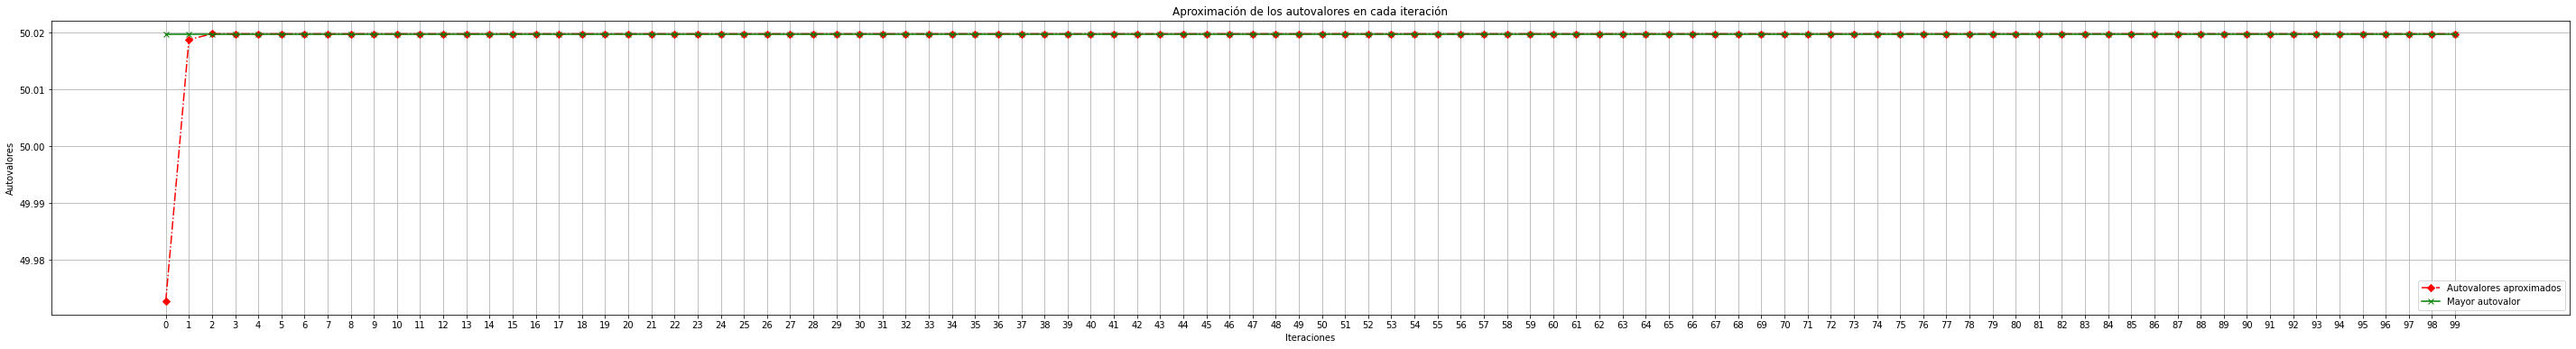

In [30]:
A = np.random.rand(100,100)
gr√°ficoAutovalores(A, 100)

  Si observamos el gr√°fico, teniendo en cuenta que la funci√≥n verde representa el autovalor de mayor m√≥dulo de A, y la funci√≥n roja la aproximaci√≥n de los autovalores con cada iteraci√≥n, se puede ver que las distancias entre ambas rectas se acorta mucho en cada paso.
  
  Ya en las primeras iteraciones se puede ver que la distancia entre ambas se va anulando, a medida que la funci√≥n de las aproximaciones se va haciendo constante, por lo que se puede decir que el m√©todo converge r√°pidamente.

**Ejercicio 3**

Veamos que la velocidad de convegencia est√° dada por la relaci√≥n entre los dos autovalores de mayor m√≥dulo.

In [31]:
def matrizAvasReales(C, K):
  return(((1/2)*(C + np.transpose(C)))+ K*np.eye(C.shape[0]))

In [32]:
def aproximarPorCuadradosM√≠nimos(e, n):
  
  #dados un grupo de pares ordenados en el plano, aplico el m√©todo de ajuste por m√≠nimos cuadrados para obtener la funci√≥n lineal 
  #que mejor se aproxime a todos

  #vector de mismas dimensiones que e, que en cada cellda contiene el n√∫mero de iteraci√≥n
  it = np.empty((n, 1))
  for i in range(n):
    it[i] = i

  #aplico f√≥rmulos del m√©todo seg√∫n los datos
  sumaIT = np.sum(it)
  sumaITpotencias = np.sum(np.power(it, 2))
  sumaValores = np.sum(e)
  sumaExIt = np.sum(np.multiply(e, it))

  #obtengo pendiente, ordenada al origen y valores de la funci√≥n de acuerdo al n√∫mero de iteraci√≥n
  m = (100*sumaExIt - sumaIT*sumaValores)/(100*sumaITpotencias - abs(sumaIT)**2)
  b = (sumaValores*sumaITpotencias - sumaIT*sumaExIt)/(100*sumaITpotencias - abs(sumaIT)**2)
  f = (it*m) + b

  return(f, m, b)

In [33]:
def funci√≥nLineal(p, b, n):

  #funci√≥n lineal dada para comparar 

  fl = np.empty((n, 1)) #vector que contiene el n√∫mero de iteraci√≥n
  for i in range(n): #aplico la funci√≥n de acuerdo a la k-√©sima iteraci√≥n
    fl[i] = 2*np.log(p)*i + np.log(b)
  return(fl)

In [34]:
def gr√°ficosErrores(B, k, pt2 = 0, pt3 = 0):

  #pt2 = 0 y pt3=0 son para indicar si graficar o no los OPTATIVOS. 
  #Si se llama a la funci√≥n poniendo 0 en sus variable o no escribiendo nada, no se grafican. Poniendo cualquie otro valor s√≠.

  #obtenemos todos los datos que vamos a necesitar para graficar

  lambda1 = sorted(np.linalg.eigvals(B), key = abs, reverse=True)[0] #lambda de mayor m√≥dulo
  lambda2 = sorted(np.linalg.eigvals(B), key = abs, reverse=True)[1] #lambda de segundo mayor m√≥dulo
  ite = np.full((k,1), lambda1) #funci√≥n constante de ava de mayor m√≥dulo
  b = m√©todoPotencia(B, k) 
  e = np.absolute(np.subtract(b,ite)) #vector de errores

  #gr√°ficos

  #gr√°fico de "iteraciones vs error con respecto a ava de mayor m√≥dulo". Este siempre se va a dibujar

  plt.figure(figsize=(50,6))
  plt.title('Errores en funci√≥n del n√∫mero de iteraci√≥n')
  plt.xlabel('Iteraciones')
  plt.xticks(range(k))
  plt.ylabel('Errores')
  plt.grid()
  plt.plot(e, 'bp-')

  #gr√°fico OPTATIVO de "iteraciones vs n√πmero del que depende la velocidad de convergencia"

  if (pt2 != 0): 
    el = np.log(e) #log(e)

    plt.figure(figsize=(50,6))
    plt.title('Diferencial errores seg√∫n iteraci√≥n')
    plt.xlabel('Iteraciones')
    plt.xticks(range(k))
    plt.ylabel('Diferencial errores')
    plt.grid()

    plt.plot(el, 'kp-')

    #gr√°fico OPTATIVO de ajuste de valores obtenidos anteriormente y funci√≥n que busc√°bamos obtener. Observar que no se puede graficar estos si 
    #no se grafic√≥ lo anterior (la parte 2)
    
    if (pt3 != 0):
      
      ajuste = aproximarPorCuadradosM√≠nimos(el, el.shape[0])
    
      plt.plot(ajuste[0], 'm*-.')
      plt.plot(funci√≥nLineal(lambda2/lambda1, e[0], e.shape[0]), 'ys:')

      plt.legend(('Logaritmo de errores', 'Ajuste por m√≠nimos cuadrados', 'Funci√≥n lineal otorgada'), prop = {'size': 10}, loc='upper right')

      print('Pendiente obtenida:', ajuste[1])
      print('Pendiente a comparar:', 2*np.log(lambda2/lambda1))

      print('Ordenada al origen obtenida:', ajuste[2])
      print('Ordenada al origen a comparar:',np.log(e[0][0]))

  plt.show()

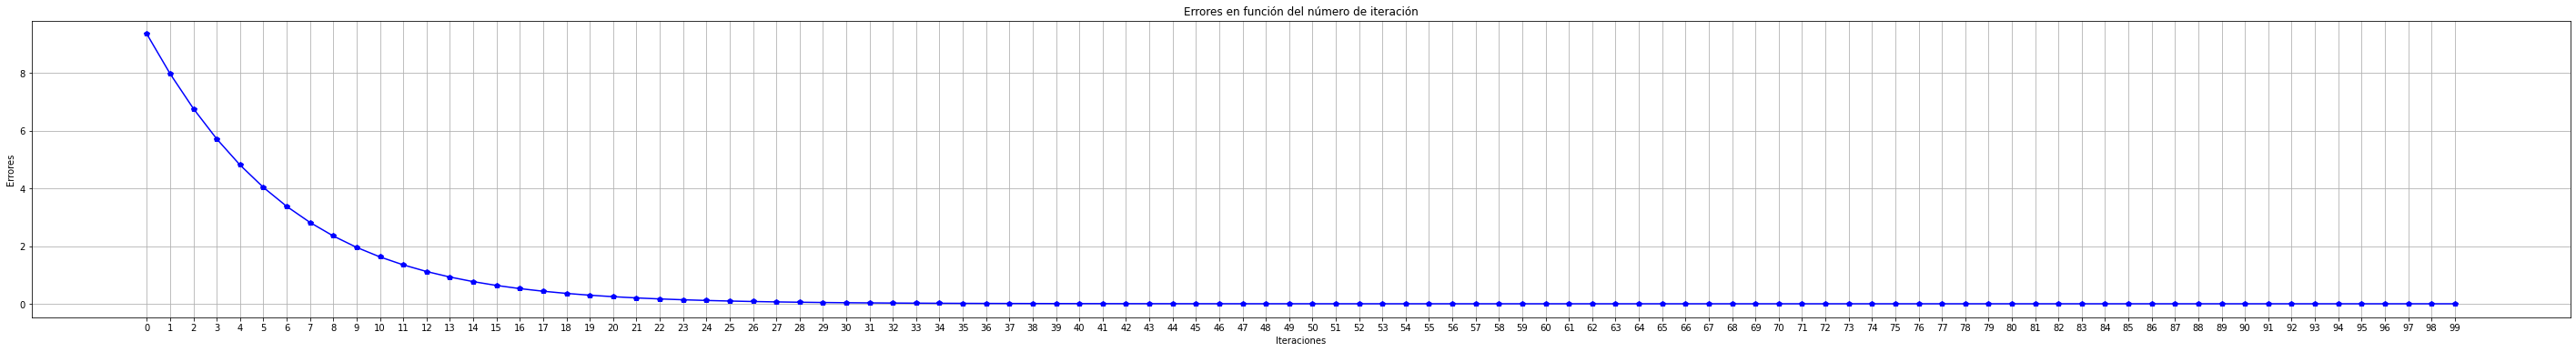

In [35]:
C = np.random.rand(100,100)
B = matrizAvasReales(C, 500)
gr√°ficosErrores(B, 100)

La funci√≥n a simple vista parece ser una funci√≥n exponencial (con exponente negativo).

Teniendo en cuenta que esta funci√≥n representa el error de cada autovalor en cada iteraci√≥n, que la velocidad de una funci√≥n se puede calcular con su derivada (en este caso estar√≠amos hablando de c√≥mo va disminuyendo el error en cada iteraci√≥n), y que dicha velocidad est√° determinada por $(\frac{Œª_{2}}{Œª_{1}})^2$, podemos tener la intuici√≥n de que la funci√≥n es de la forma $e^{-a(\frac{Œª_{2}}{Œª_{1}})^2x+b}$.

Recordando que $\ln(e^{x}) = x $, apliquemos entonces la funci√≥n inversa para poder visulizar bien el exponente, cuya pendiente no solo determina la magnitud y sentido de velocidad de convergencia, sino que obtenemos el dominio de la funci√≥n, que nos muestra c√≥mo es la relaci√≥n entre los errores por cada iteraci√≥n.

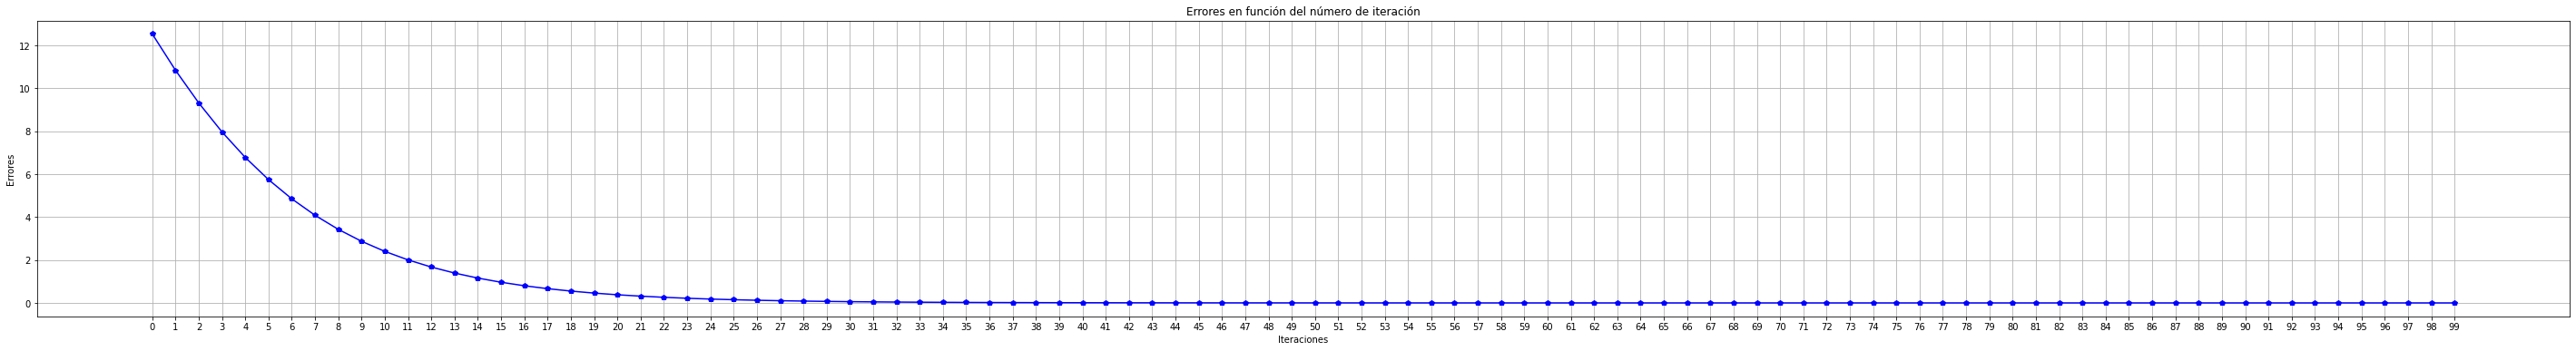

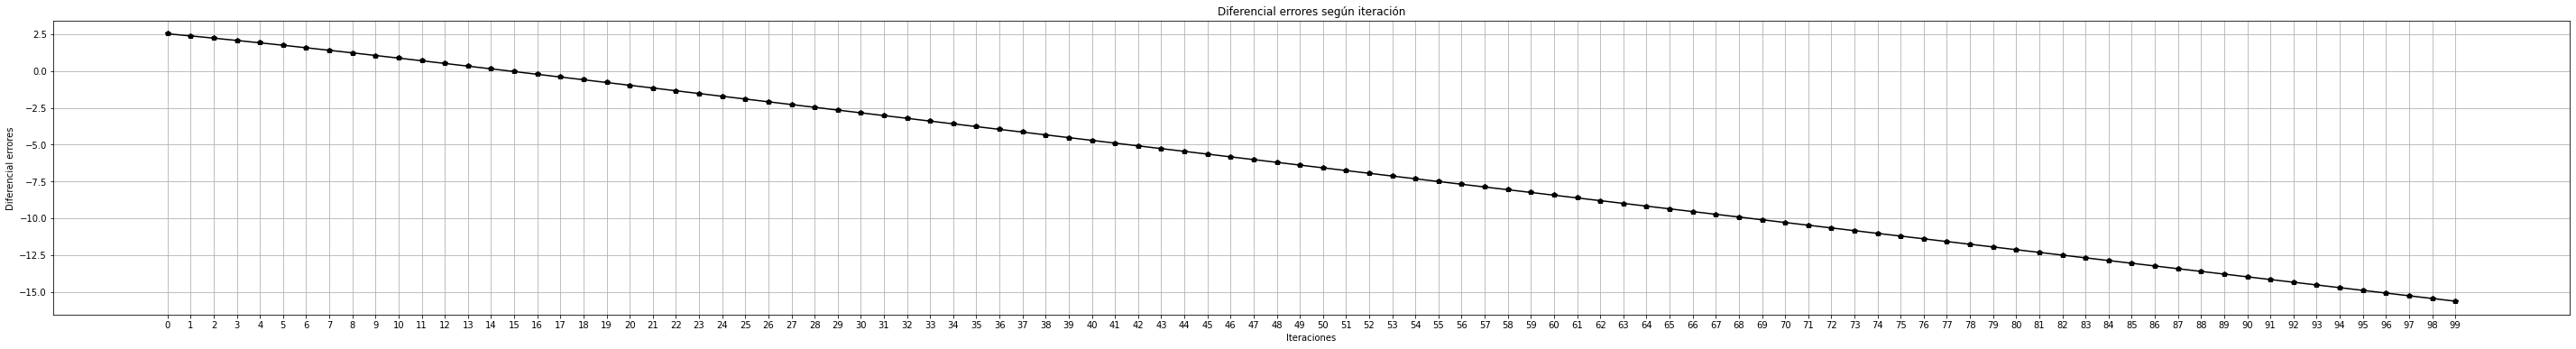

In [36]:
gr√°ficosErrores(B,100, 1)

Parece que obtuvimos una funci√≥n lineal. Ajust√©mosla con el m√©todo de cuadrados m√≠nimos y veamos cu√°l es su pendiente y comparemos con la funci√≥n $2\ln(\frac{Œª_{2}}{Œª_{1}})+ \ln(e_{0})$.

Pendiente obtenida: -0.18717429791215237
Pendiente a comparar: -0.17513104892823678
Ordenada al origen obtenida: 2.543218143806449
Ordenada al origen a comparar: 2.400869032330055


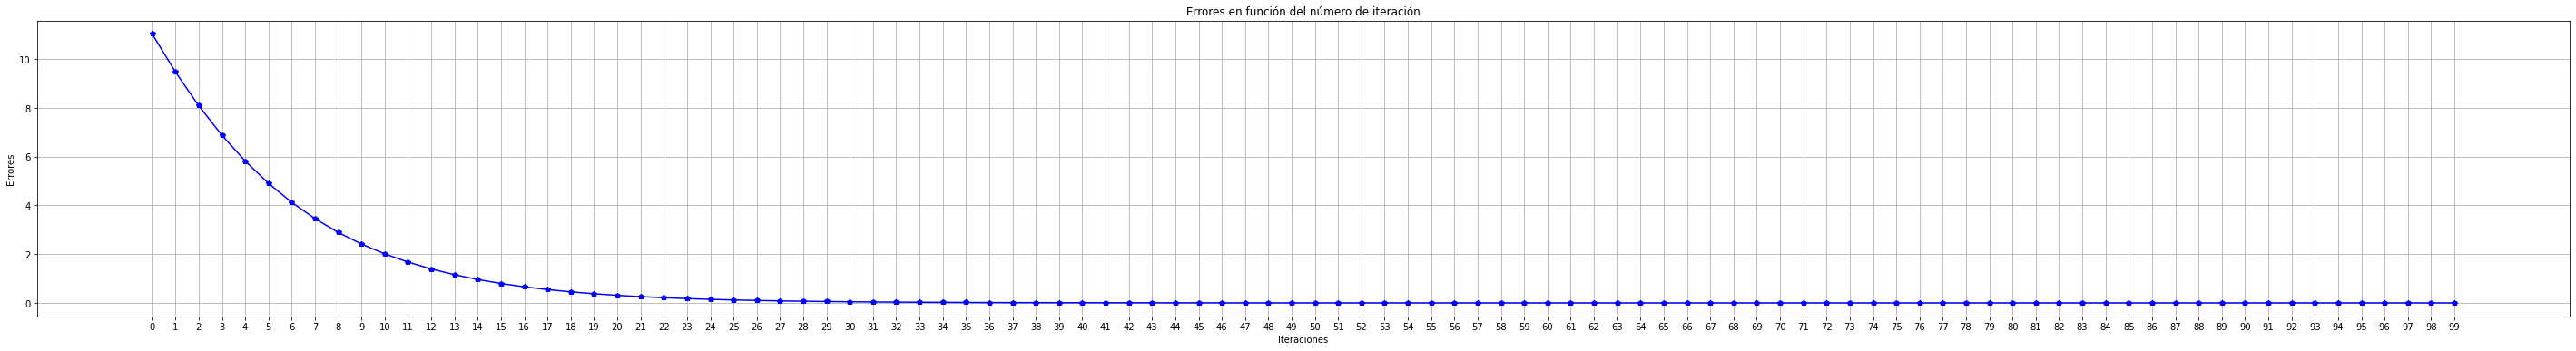

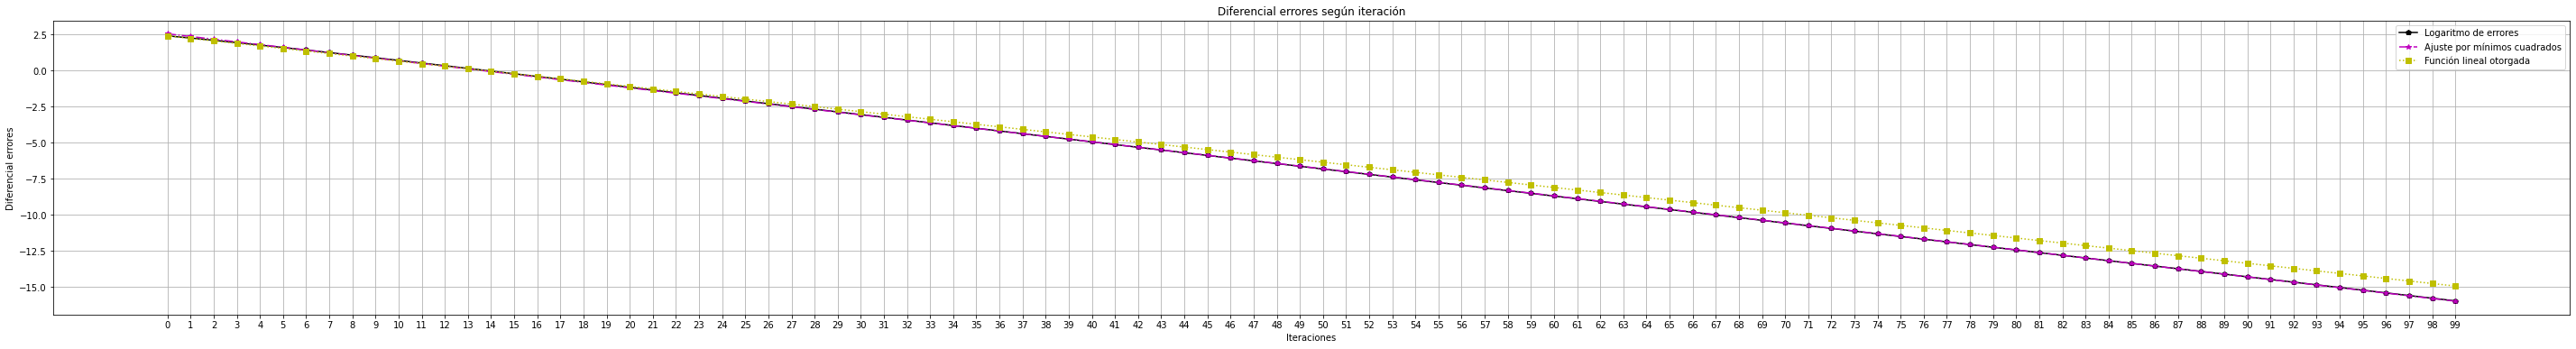

In [37]:
gr√°ficosErrores(B, 100, 1, 1)

Como se puede observar, si bien no tienen pendientes iguales, son muy parecidas.


**Ejercicio 4**

Repitamos el experimento para distintas iteraciones, K=1000, 2000 y 5000, y comparemos las velocidades.

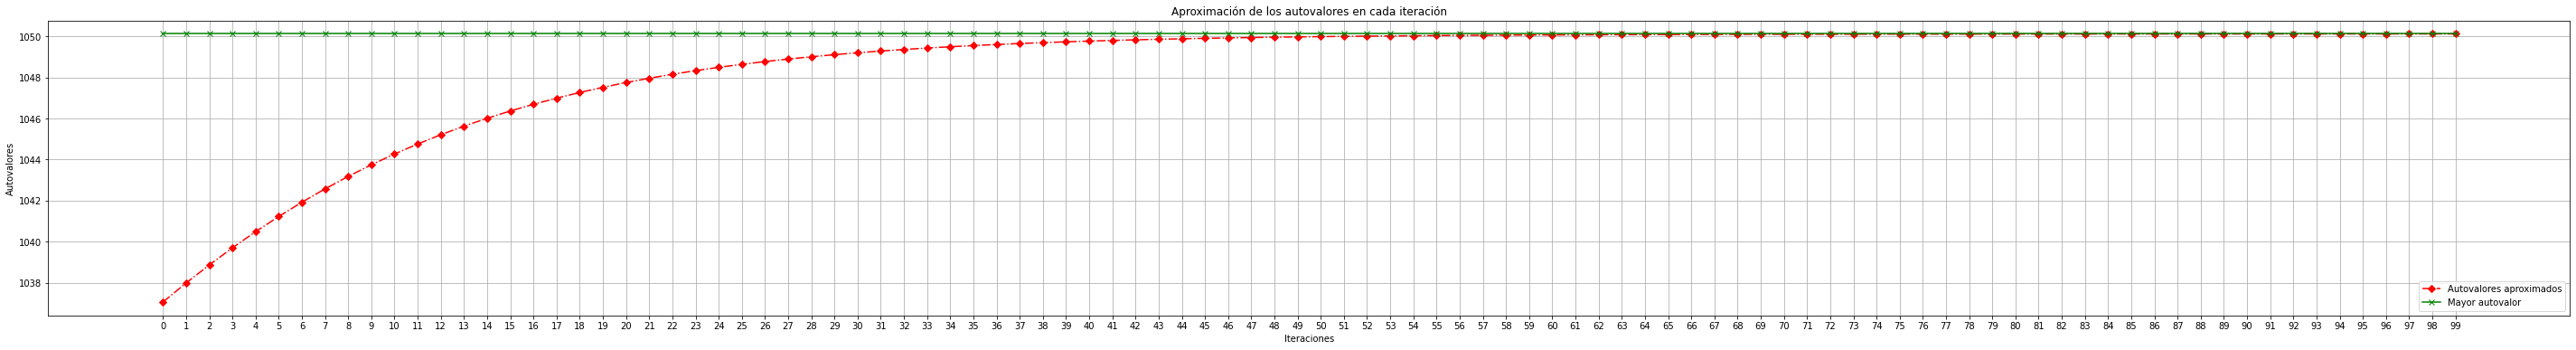

Pendiente obtenida: -0.09636092848666314
Pendiente a comparar: -0.08983016597283665
Ordenada al origen obtenida: 2.513780913883491
Ordenada al origen a comparar: 2.375950901501628


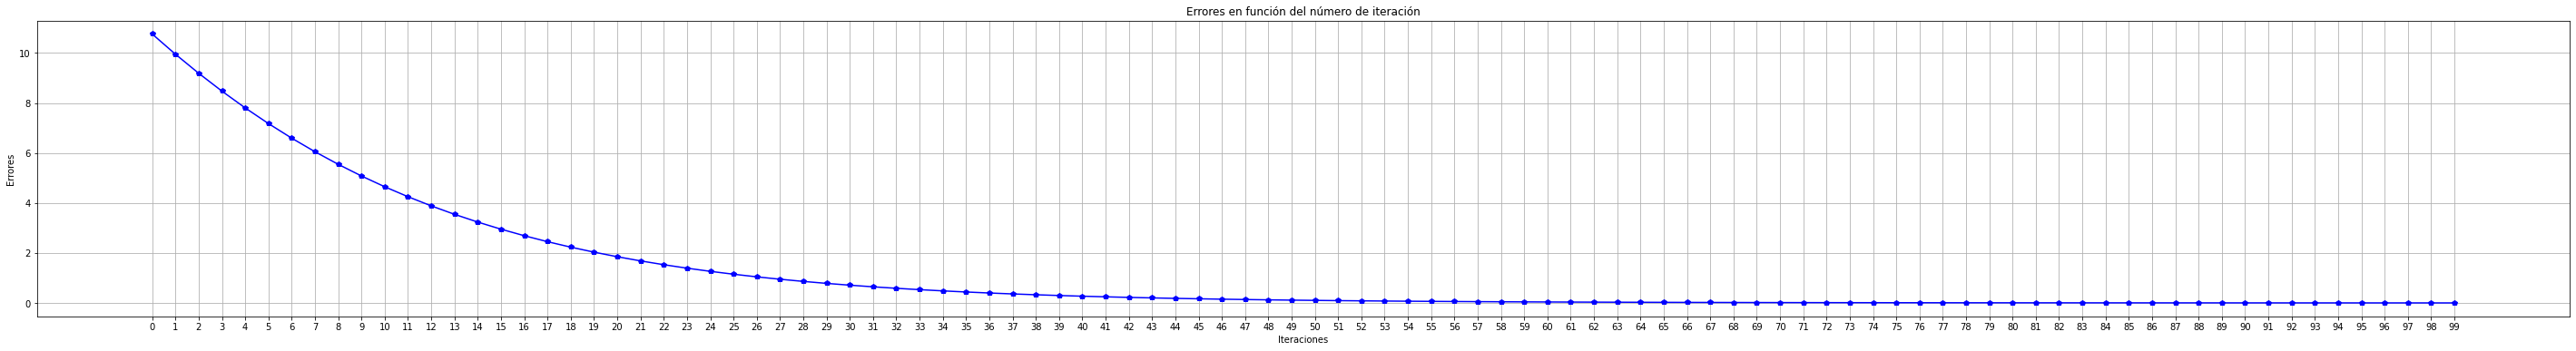

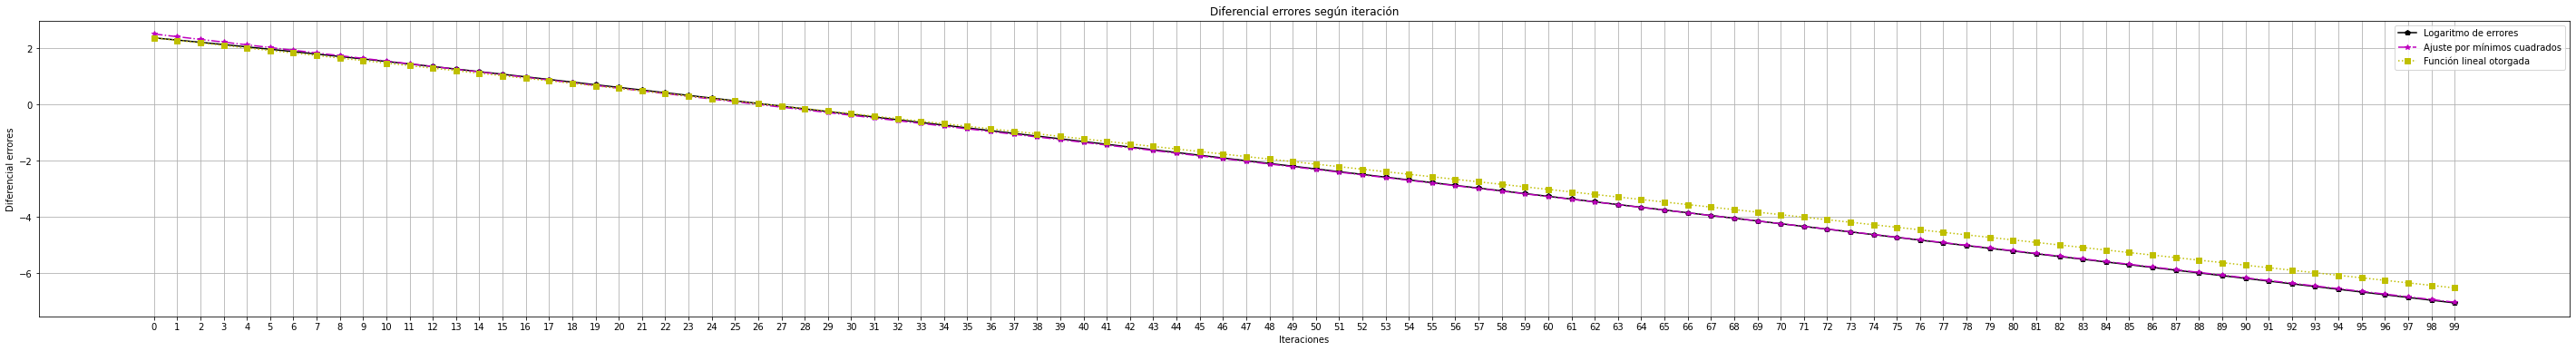

In [38]:
B = matrizAvasReales(C, 1000)
gr√°ficoAutovalores(B, 100)
gr√°ficosErrores(B, 100, 1, 1)

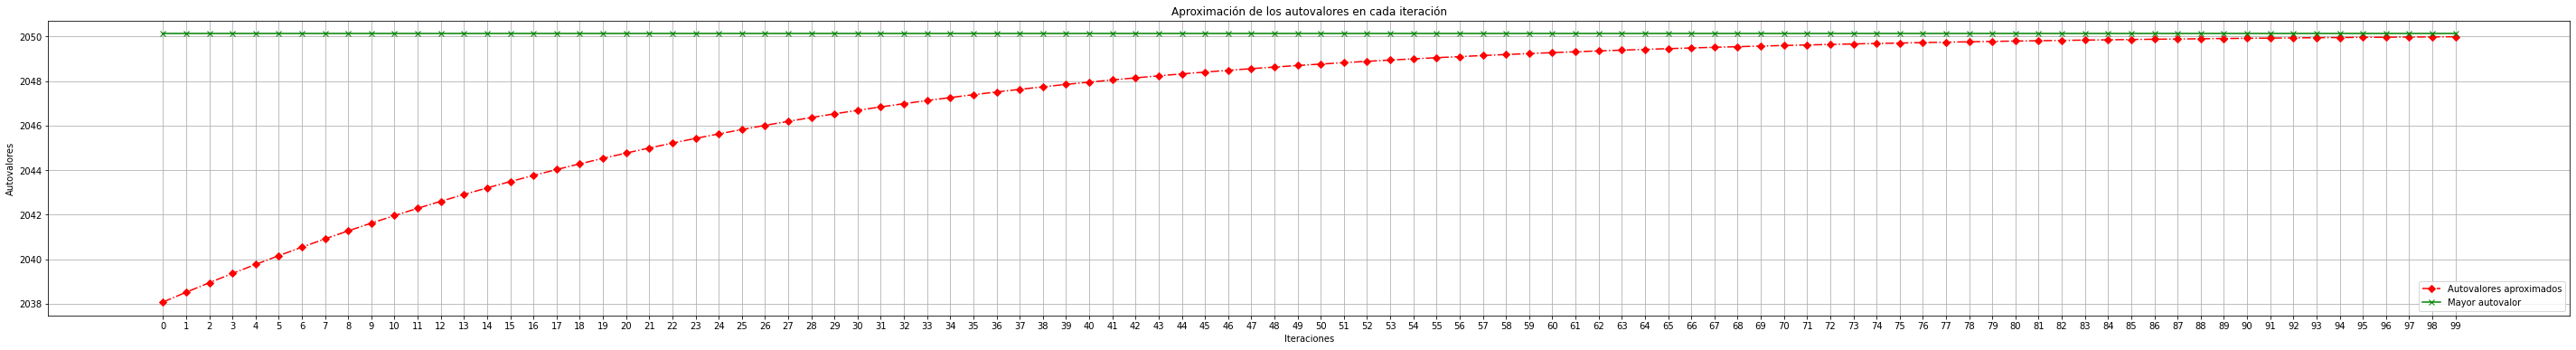

Pendiente obtenida: -0.0475871032492541
Pendiente a comparar: -0.0455089408039747
Ordenada al origen obtenida: 2.3965951932373653
Ordenada al origen a comparar: 2.3114296013859823


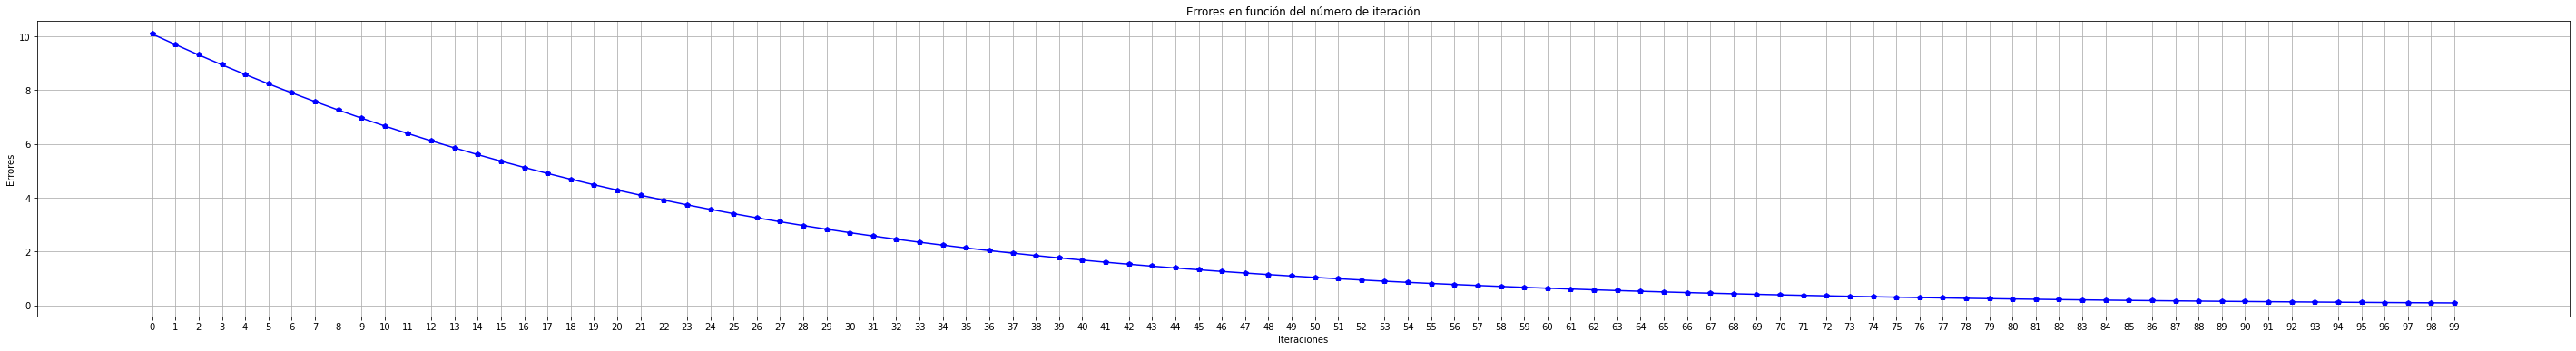

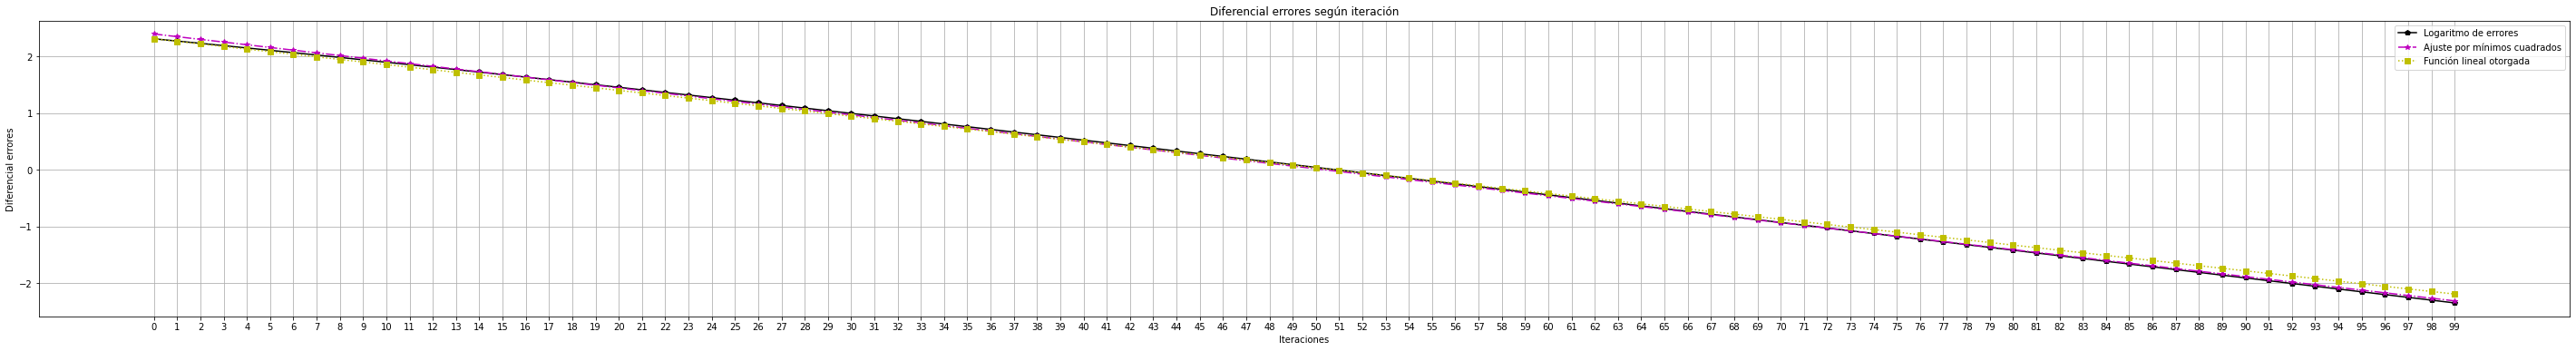

In [39]:
B = matrizAvasReales(C, 2000)
gr√°ficoAutovalores(B, 100)
gr√°ficosErrores(B, 100, 1, 1)

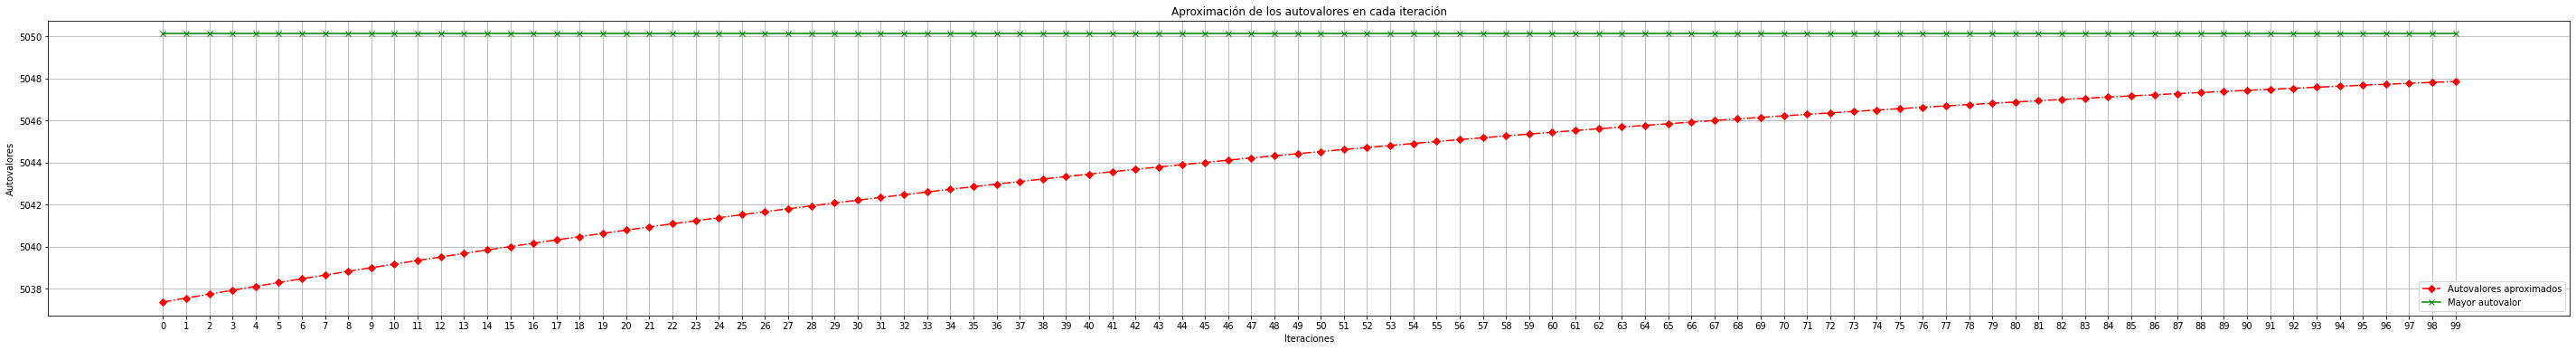

Pendiente obtenida: -0.017687999169024346
Pendiente a comparar: -0.01834988355658907
Ordenada al origen obtenida: 2.496617643371841
Ordenada al origen a comparar: 2.461864564954942


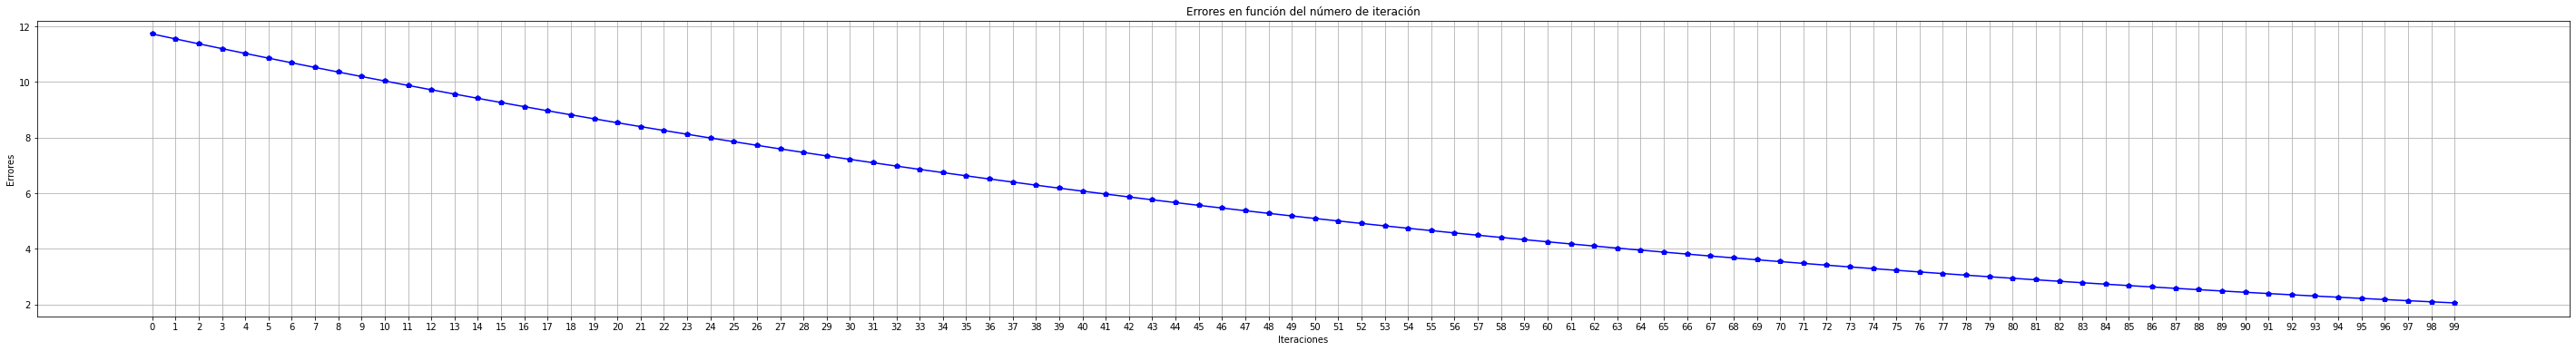

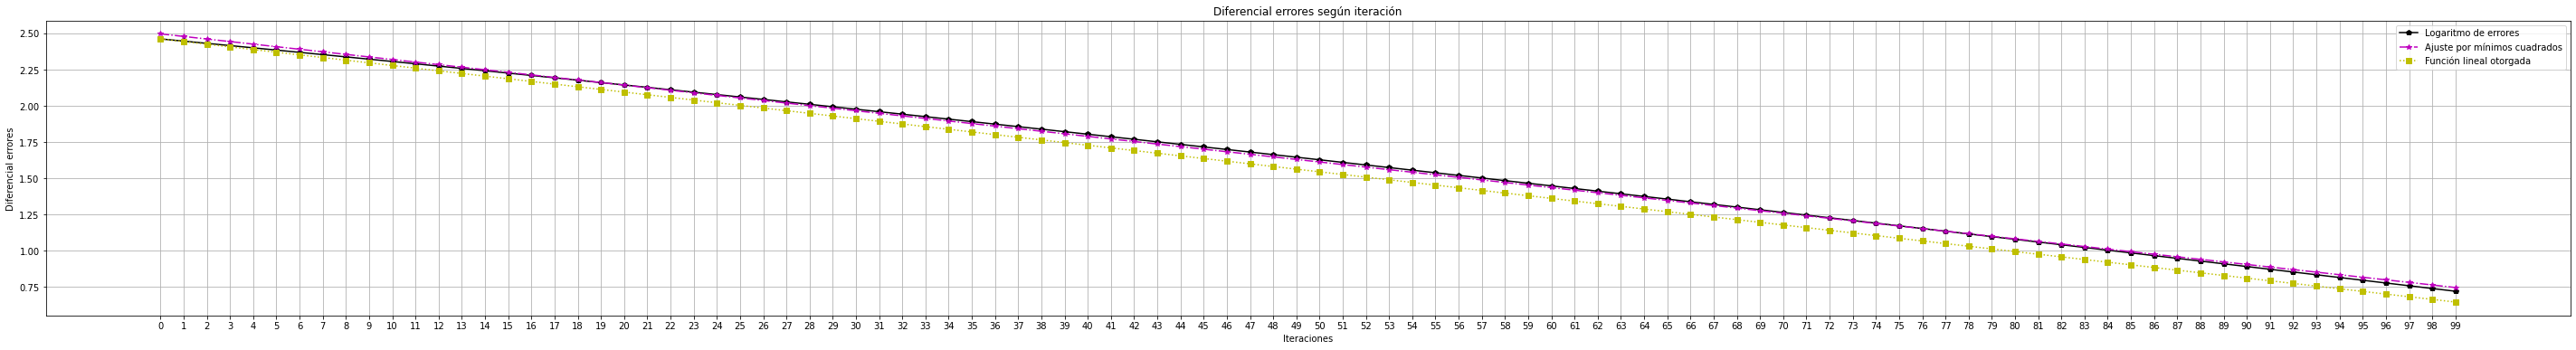

In [40]:
B = matrizAvasReales(C, 5000)
gr√°ficoAutovalores(B, 100)
gr√°ficosErrores(B, 100, 1, 1)

Observemos que a medida que crece K (los valores en la diagonal principal), la funci√≥n roja tarda m√°s en parecerse a la funci√≥n verde, y las pendientes que aproximan a cada punto de la funci√≥n azul se acercan m√°s a 0, es decir que la velocidad de convergencia disminuye.

Esto se debe a la propiedad: "Œª + Œº es autovalor de Œë + Œºùêº, con el mismo autovector".

Sabiendo que la velocidad est√° determinada por $2\ln(\frac{Œª_{2}}{Œª_{1}})$, ahora va quedar determinada por $2\ln(\frac{Œª_{2} + \mu}{Œª_{1} + \mu})$ y teniendo en cuenta que $|{Œª_{1}}| > |{Œª_{2}}|$ tenemos que 
$2*lim_{n\to\infty} \ln(\frac{Œª_{2} + \mu}{Œª_{1} + \mu}) = 0 $.
